In [2]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [3]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=uciSYnHOIn9WjaYvfzqjhwTa996cQY&access_type=offline


id                                               joke    origin_id  \
9  1099  Frankenstein enters a bodybuilding competition...  6wXLeVDQukb   

   culture        category                                        description  \
9  General  icanhazdadjoke  A joke about Frankenstein misunderstanding a b...   

                        title       c1_name c2_name c1_gender  ...  \
9  Bodybuilding Misunderstood  Frankenstein   Judge      male  ...   

                           c1_2  \
9  Wait, where are the weights?   

                                                c2_2  \
9  It's about building muscle, not assembling bod...   

                                                 n_3  \
9  The judge sighed while Frankenstein scratched ...   

                                   c1_3        c2_3  \
9  I guess I really misunderstood this.  You think?   

                                           n_4  \
9  Frankenstein left the stage, still puzzled.   

                              c1_4        c2_4  \
9  Maybe I should stick to my lab.  Good idea.   

                                         script_flow          image_id  
9  [n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...  h8aFv3PD9swzK3fz  

[1 rows x 25 columns]

### Code 101&102: Generate Story and Images

In [18]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

Why can't your nose be 12 inches long? Because then it'd be a foot!


In [19]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [20]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

### Code 104: SNS Messages

In [20]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1090_GoodDay.json' and branch: 'main'
  - documentId: 163o5Qxnn7nkgstv1uqObe0gfle9mBi-saLF2dUFV58s
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1091_StockholmSyndrome.json' and branch: 'main'
  - documentId: 19iNqB_pO5-41ny4HtupBpS7dRTryWdm-OaDJhPJRANI
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1092_ShadyTrees.json' and branch: 'main'
  - documentId: 1h1gzTx13am78KrdBeEi-j6_rADzM6to1Vqiwc-PvqGY
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge fil

x

### Video Creation

In [22]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# Define ids of video to be generated
id_list = [i for i in range(1090, 1100)] 
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: 'auto' for id_ in id_list})
clip.copy(exp_crop_mode)

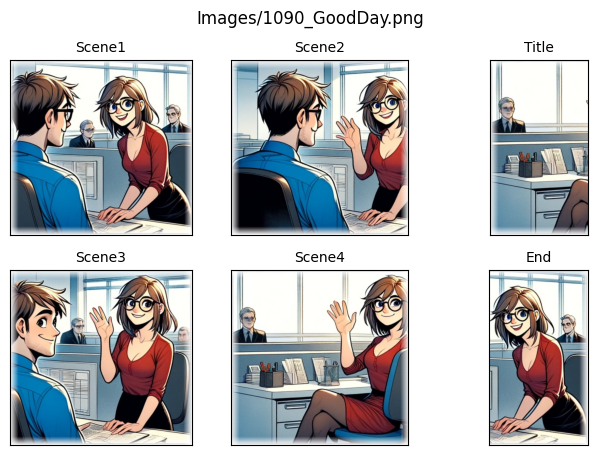

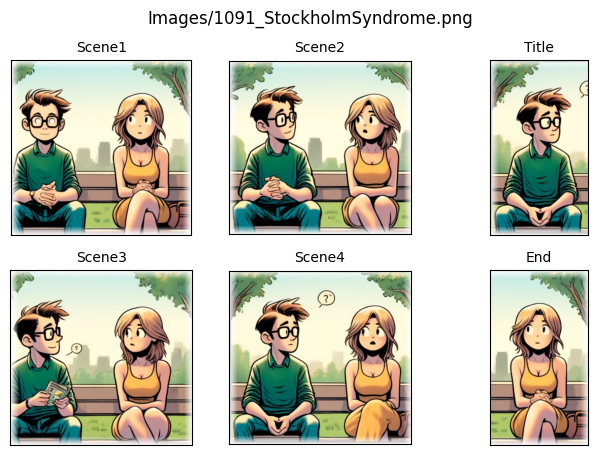

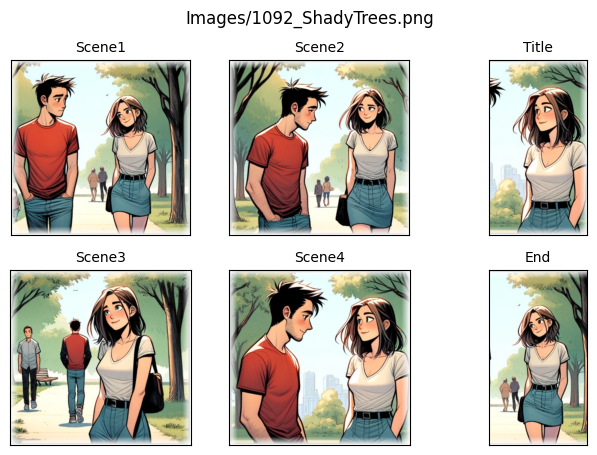

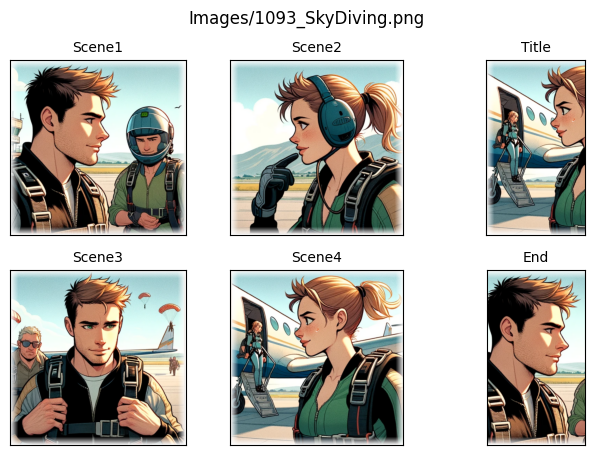

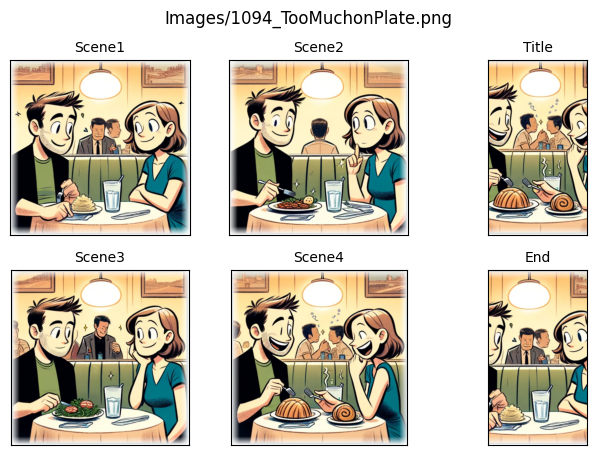

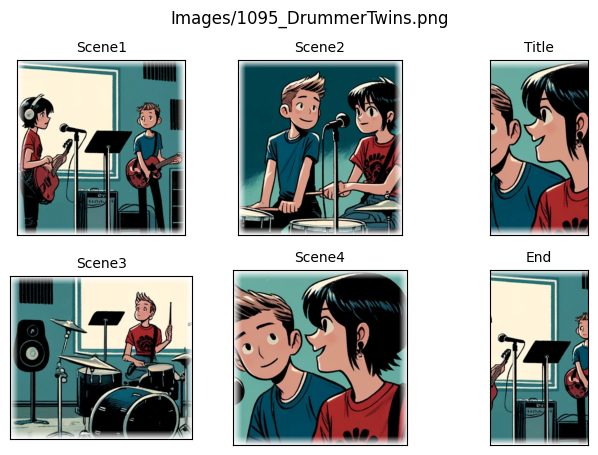

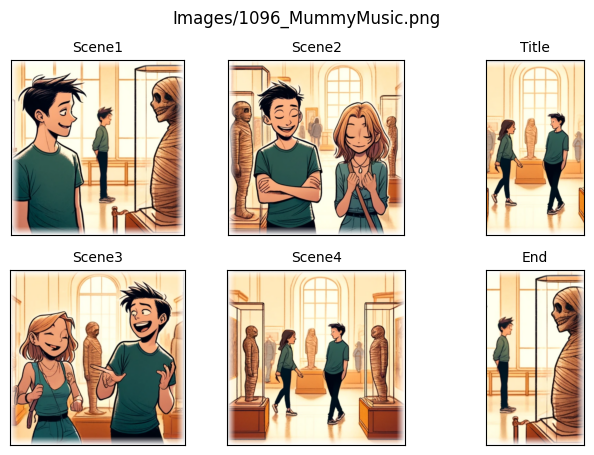

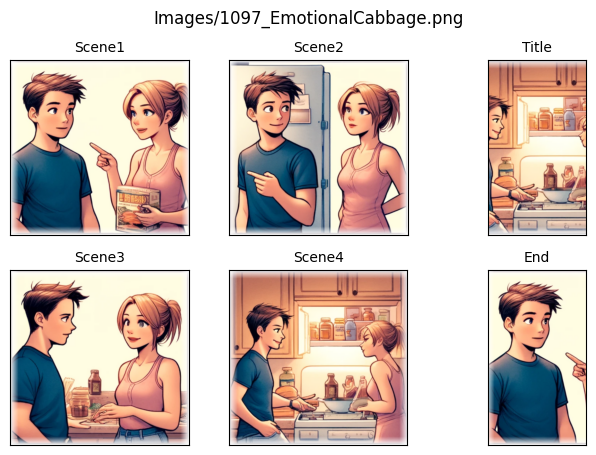

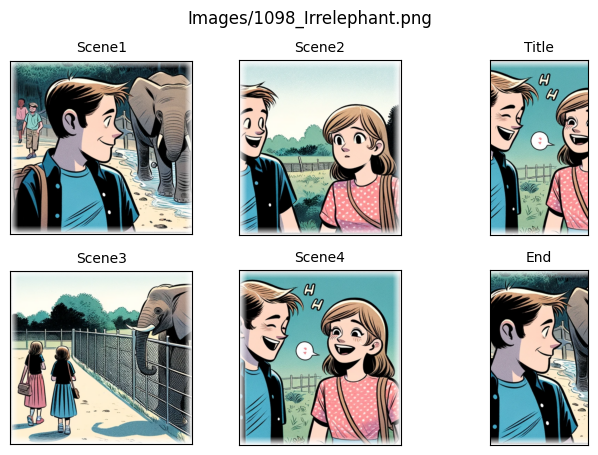

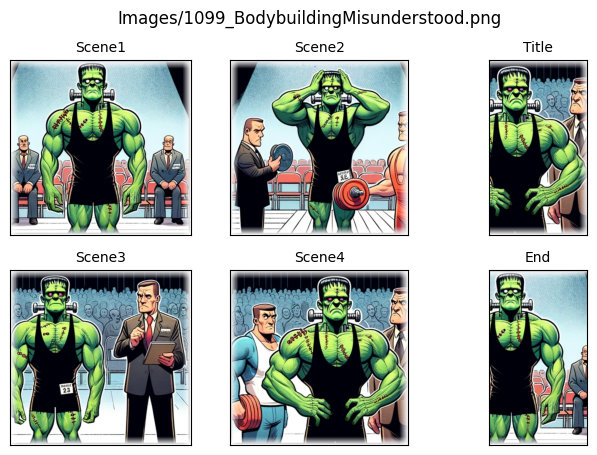

In [23]:
# Get list of image paths
img_path = [f"Images/{p}" for p in os.listdir('Images') if int(p.split('_')[0]) in id_list]

# Test image cropping
video.image_crop_test(img_path)

In [24]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here
crop_mode = crop_mode = {1090: 'auto', 1091: 'auto', 1092: 'auto', 1093: 'auto', 1094: 'auto', 1095: 'auto', 1096: 'auto', 1097: 'auto', 1098: 'auto', 1099: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=id_list, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

Moviepy - Building video Videos/1090_GoodDay.mp4.
MoviePy - Writing audio in 1090_GoodDayTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1090_GoodDay.mp4



Moviepy - Done !
Moviepy - video ready Videos/1090_GoodDay.mp4
Moviepy - Building video Videos/1091_StockholmSyndrome.mp4.
MoviePy - Writing audio in 1091_StockholmSyndromeTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1091_StockholmSyndrome.mp4



Moviepy - Done !
Moviepy - video ready Videos/1091_StockholmSyndrome.mp4
Moviepy - Building video Videos/1092_ShadyTrees.mp4.
MoviePy - Writing audio in 1092_ShadyTreesTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1092_ShadyTrees.mp4



Moviepy - Done !
Moviepy - video ready Videos/1092_ShadyTrees.mp4
Moviepy - Building video Videos/1093_SkyDiving.mp4.
MoviePy - Writing audio in 1093_SkyDivingTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1093_SkyDiving.mp4



Moviepy - Done !
Moviepy - video ready Videos/1093_SkyDiving.mp4
Moviepy - Building video Videos/1094_TooMuchonPlate.mp4.
MoviePy - Writing audio in 1094_TooMuchonPlateTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1094_TooMuchonPlate.mp4



Moviepy - Done !
Moviepy - video ready Videos/1094_TooMuchonPlate.mp4
Moviepy - Building video Videos/1095_DrummerTwins.mp4.
MoviePy - Writing audio in 1095_DrummerTwinsTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1095_DrummerTwins.mp4



Moviepy - Done !
Moviepy - video ready Videos/1095_DrummerTwins.mp4
Moviepy - Building video Videos/1096_MummyMusic.mp4.
MoviePy - Writing audio in 1096_MummyMusicTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1096_MummyMusic.mp4



Moviepy - Done !
Moviepy - video ready Videos/1096_MummyMusic.mp4
Moviepy - Building video Videos/1097_EmotionalCabbage.mp4.
MoviePy - Writing audio in 1097_EmotionalCabbageTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1097_EmotionalCabbage.mp4



Moviepy - Done !
Moviepy - video ready Videos/1097_EmotionalCabbage.mp4
Moviepy - Building video Videos/1098_Irrelephant.mp4.
MoviePy - Writing audio in 1098_IrrelephantTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1098_Irrelephant.mp4



Moviepy - Done !
Moviepy - video ready Videos/1098_Irrelephant.mp4
Moviepy - Building video Videos/1099_BodybuildingMisunderstood.mp4.
MoviePy - Writing audio in 1099_BodybuildingMisunderstoodTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1099_BodybuildingMisunderstood.mp4



Moviepy - Done !
Moviepy - video ready Videos/1099_BodybuildingMisunderstood.mp4
['1090_GoodDay', '1091_StockholmSyndrome', '1092_ShadyTrees', '1093_SkyDiving', '1094_TooMuchonPlate', '1095_DrummerTwins', '1096_MummyMusic', '1097_EmotionalCabbage', '1098_Irrelephant', '1099_BodybuildingMisunderstood']


### Video Schedule Post

In [25]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [26]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


Title  \
0                    Joke Story: Good Day   
1          Joke Story: Stockholm Syndrome   
2                 Joke Story: Shady Trees   
3                  Joke Story: Sky Diving   
4            Joke Story: Too Muchon Plate   
5               Joke Story: Drummer Twins   
6                 Joke Story: Mummy Music   
7           Joke Story: Emotional Cabbage   
8                 Joke Story: Irrelephant   
9  Joke Story: Bodybuilding Misunderstood   

                                             Content  \
0  🚗🍝 Dive into "Good Day," where office humor me...   
1  📖 Dive into "Stockholm Syndrome," where a book...   
2  🌳☀️ Dive into "Shady Trees," where park stroll...   
3  ✈️ Dive into "Sky Diving," where not succeedin...   
4  🍽️ Dive into "Too Much on Plate," where starti...   
5  🥁 Dive into "Drummer Twins," where musical hum...   
6  🎵 Dive into "Mummy Music," where ancient being...   
7  🥬 Dive into "Emotional Cabbage," where vegetab...   
8  🐘 Dive into "Irrelephant," where size doesn't ...   
9  🏋️‍♂️ Dive into "Bodybuilding Misunderstood," ...   

                                        Path              Schedule  
0                    Videos/1090_GoodDay.mp4  2024-05-20T12:00:00Z  
1          Videos/1091_StockholmSyndrome.mp4  2024-05-20T13:00:00Z  
2                 Videos/1092_ShadyTrees.mp4  2024-05-21T12:00:00Z  
3                  Videos/1093_SkyDiving.mp4  2024-05-21T13:00:00Z  
4             Videos/1094_TooMuchonPlate.mp4  2024-05-22T12:00:00Z  
5               Videos/1095_DrummerTwins.mp4  2024-05-22T13:00:00Z  
6                 Videos/1096_MummyMusic.mp4  2024-05-23T12:00:00Z  
7           Videos/1097_EmotionalCabbage.mp4  2024-05-23T13:00:00Z  
8                Videos/1098_Irrelephant.mp4  2024-05-24T12:00:00Z  
9  Videos/1099_BodybuildingMisunderstood.mp4  2024-05-24T13:00:00Z

In [4]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': 'YymlI-y9Z8A'}
{'status': 'success', 'videoId': '2HQlNbH5Tzo'}
{'status': 'success', 'videoId': 'P1gFPzUwDV8'}
{'status': 'success', 'videoId': 'NVFVlRllBNg'}


In [28]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ['Joke Story: Mummy Music', 'Joke Story: Emotional Cabbage', 'Joke Story: Irrelephant', 'Joke Story: Bodybuilding Misunderstood']
v_contents = ['🎵 Dive into "Mummy Music," where ancient beings groove to modern beats! 😂 Alex and Nina are visiting a museum. \'What kind of music do mummies like?\' Alex asks. \'I don\'t know, what?\' Nina responds. Alex grins as they look at the mummies, \'Rap.\' Nina laughs, \'Ha! That\'s funny!\' This comic strip humorously combines ancient history with modern music. #MuseumHumor #MusicJokes #FunnyMummies #Humor #HistoricalLaughs\n\n🏫 English Explanation 🗣️:\n1. **Ancient beings**: Refers to entities from very old times, like mummies.\n2. **Groove**: To enjoy music with a strong rhythm; to dance or move to music.\n3. **Modern beats**: Contemporary rhythms and styles of music.\n4. **Grins**: To smile broadly, often in a way that shows pleasure or amusement.\n5. **Humorously**: In a way that is funny or amusing.\n\n#shorts #LearnEnglish #StudyE

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

id  culture   category  \
185  185  General  Valentine   
186  186  General  Valentine   
187  187  General  Valentine   
188  188  General  Valentine   
189  189  General  Valentine   

                                                  joke  
185  What's a chocolate's favorite kind of music on...  
186  Why was the chocolate box nervous on Valentine...  
187  How do chocolates stay fit for Valentine's Day...  
188  What did the chocolate say to the Valentine's ...  
189  Why did the chocolate give his girlfriend a bo...

In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

id  culture             category  \
157  157  General  Observational humor   
158  158  General       Wordplay jokes   
159  159  General         Animal jokes   
160  160  General         Doctor jokes   
161  161  General     Technology jokes   

                                                  joke  
157  Isn't it funny how we never see snowmen at the...  
158  If April showers bring May flowers, what do Ma...  
159  Why don’t polar bears get married in winter? B...  
160  Why do doctors make the worst snowmen? Because...  
161  Why did the smartphone wear a scarf? Because i...

In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs